# 1.PosteriorDB

In [31]:
from posteriordb import PosteriorDatabase
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
pdb_path = "../posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

In [3]:
posterior = my_pdb.posterior("eight_schools-eight_schools_centered")

model = posterior.model
data = posterior.data

In [5]:
model.information

{'name': 'eight_schools_centered',
 'title': 'A centered hiearchical model for 8 schools',
 'description': 'A centered hiearchical model for the 8 schools example of Rubin (1981)',
 'keywords': ['bda3_example', 'hiearchical'],
 'references': ['rubin1981estimation', 'gelman2013bayesian'],
 'urls': 'http://www.stat.columbia.edu/~gelman/arm/examples/schools',
 'prior': {'keywords': []},
 'added_by': 'Mans Magnusson',
 'added_date': '2019-08-12'}

In [33]:
print(model.code("stan"))

data {
  int<lower=0> J; // number of schools
  array[J] real y; // estimated treatment
  array[J] real<lower=0> sigma; // std of estimated effect
}
parameters {
  array[J] real theta; // treatment effect in school j
  real mu; // hyper-parameter of mean
  real<lower=0> tau; // hyper-parameter of sdv
}
model {
  tau ~ cauchy(0, 5); // a non-informative prior
  theta ~ normal(mu, tau);
  y ~ normal(theta, sigma);
  mu ~ normal(0, 5);
}





In [6]:
data.information

{'name': 'eight_schools',
 'keywords': ['bda3_example'],
 'title': 'The 8 schools dataset of Rubin (1981)',
 'description': 'A study for the Educational Testing Service to analyze the effects of\nspecial coaching programs on test scores. See Gelman et. al. (2014), Section 5.5 for details.',
 'urls': ['http://www.stat.columbia.edu/~gelman/arm/examples/schools'],
 'references': ['rubin1981estimation', 'gelman2013bayesian'],
 'added_by': 'Mans Magnusson',
 'added_date': '2019-08-12'}

In [4]:
posterior.information

{'keywords': ['stan benchmark', 'pathfinder paper'],
 'dimensions': {'theta': 8, 'mu': 1, 'tau': 1},
 'added_by': 'Mans Magnusson',
 'added_date': '2019-08-12'}

In [7]:
data.values()

{'J': 8,
 'y': [28, 8, -3, 7, -1, 1, 18, 12],
 'sigma': [15, 10, 16, 11, 9, 11, 10, 18]}

In [8]:
posterior.reference_draws_info()

{'name': 'eight_schools-eight_schools_noncentered',
 'inference': {'method': 'stan_sampling',
  'method_arguments': {'chains': 10,
   'iter': 20000,
   'warmup': 10000,
   'thin': 10,
   'seed': 4711,
   'control': {'adapt_delta': 0.95}}},
 'diagnostics': {'diagnostic_information': {'names': ['mu',
    'tau',
    'theta[1]',
    'theta[2]',
    'theta[3]',
    'theta[4]',
    'theta[5]',
    'theta[6]',
    'theta[7]',
    'theta[8]']},
  'ndraws': 10000,
  'nchains': 10,
  'effective_sample_size_bulk': [10041.0896201168,
   9989.27163956509,
   10095.2967716424,
   10048.7605290177,
   9533.22696994086,
   10026.3139529165,
   9921.76671546211,
   9782.69125918,
   10038.5121243522,
   9605.15453269234],
  'effective_sample_size_tail': [9973.47696505836,
   9992.18100324749,
   9732.47952723908,
   10139.1087989181,
   9338.98171714254,
   9665.77831222399,
   10206.5263539246,
   10038.5763550319,
   9689.92308837161,
   9870.88374609811],
  'r_hat': [0.99976115558753,
   0.999845473

In [9]:
reference_draws = posterior.reference_draws()
len(reference_draws)

10

In [10]:
reference_draws_df = pd.concat([pd.DataFrame(chain_draw).assign(chain_id=i) for i, chain_draw in enumerate(reference_draws)])
reference_draws_df["step"] = reference_draws_df.index
reference_draws_df.describe()

,theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8],mu,tau,chain_id,step
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.150502,4.939581,3.905906,4.796017,3.614436,4.051148,6.317170,4.883997,4.410518,3.602060,4.500000,499.500000
std,5.615863,4.645578,5.280712,4.770938,4.614721,4.796248,5.002855,5.317692,3.309296,3.198478,2.872425,288.689425
min,-23.754572,-18.927296,-32.913468,-21.858362,-20.021086,-25.780099,-15.374511,-24.191577,-8.522041,0.000319,0.000000,0.000000
25%,2.657464,2.042394,1.075470,1.925907,0.958587,1.247763,2.998518,1.820610,2.183137,1.278335,2.000000,249.750000
50%,5.589011,4.772916,4.105384,4.695256,3.820430,4.161817,5.795003,4.785269,4.363895,2.747021,4.500000,499.500000
75%,8.844179,7.632079,7.112780,7.612812,6.547935,7.077320,8.994351,7.857821,6.640063,4.966329,7.000000,749.250000
max,38.810345,29.230657,36.136086,26.871145,24.533735,27.341015,33.998674,54.047641,19.468784,33.245679,9.000000,999.000000


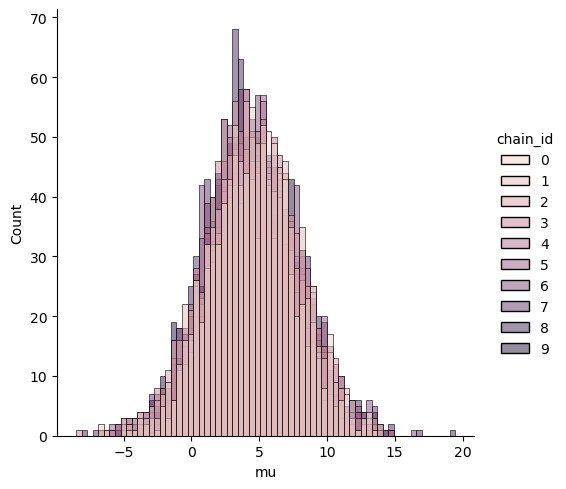

In [28]:
sns.displot(reference_draws_df, x="mu", hue="chain_id")

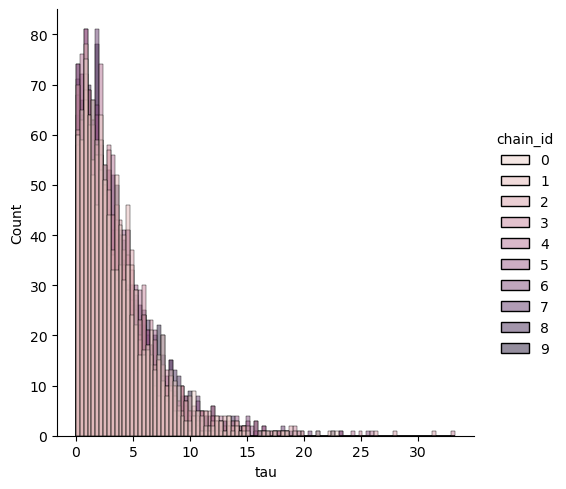

In [30]:
sns.displot(reference_draws_df, x="tau", hue="chain_id")

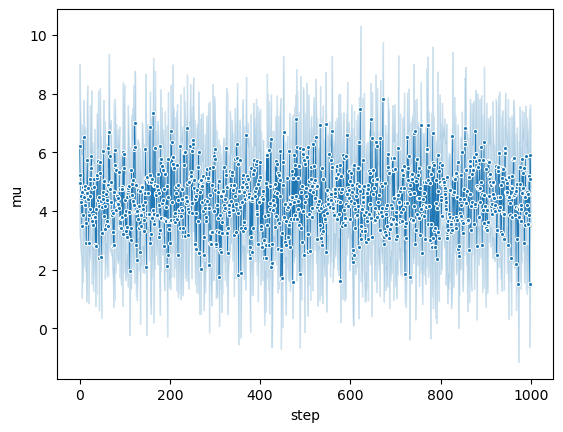

In [12]:
sns.lineplot(reference_draws_df, x="step", y="mu", lw=.5, marker='.')
plt.show()

# 2.NumPyro

In [13]:
import numpyro
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS
from numpyro.infer.inspect import render_model
# from numpyro.infer.reparam import TransformReparam

In [14]:
J = data.values()['J']
y = np.array(data.values()['y'])
sigma = np.array(data.values()['sigma'])

In [15]:
print(model.code("stan"))

data {
  int<lower=0> J; // number of schools
  array[J] real y; // estimated treatment
  array[J] real<lower=0> sigma; // std of estimated effect
}
parameters {
  array[J] real theta; // treatment effect in school j
  real mu; // hyper-parameter of mean
  real<lower=0> tau; // hyper-parameter of sdv
}
model {
  tau ~ cauchy(0, 5); // a non-informative prior
  theta ~ normal(mu, tau);
  y ~ normal(theta, sigma);
  mu ~ normal(0, 5);
}





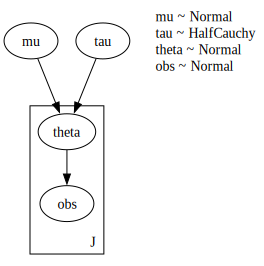

In [16]:
# Eight Schools model

def eight_schools(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

render_model(eight_schools, model_args=(J, sigma), render_distributions=True)

In [17]:
kernel = NUTS(eight_schools)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=10000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, J, sigma, y=y, extra_fields=('potential_energy',))

sample: 100%|████| 11000/11000 [00:03<00:00, 3376.16it/s, 15 steps of size 1.71e-01. acc. prob=0.80]


In [18]:
posterior_samples = mcmc.get_samples()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.37      3.31      4.46     -0.76      9.95    803.17      1.00
       tau      3.72      3.02      2.90      0.51      7.69    712.84      1.00
  theta[0]      6.15      5.55      5.62     -2.38     14.48   1500.42      1.00
  theta[1]      4.93      4.73      4.89     -2.83     12.63   1610.56      1.00
  theta[2]      3.90      5.24      4.19     -4.08     12.45   2020.64      1.00
  theta[3]      4.75      4.78      4.70     -3.08     12.19   1803.73      1.00
  theta[4]      3.57      4.60      3.81     -3.75     10.88   1659.75      1.00
  theta[5]      3.99      4.90      4.17     -3.85     11.84   1660.14      1.00
  theta[6]      6.29      5.08      5.91     -1.99     14.06   1127.07      1.00
  theta[7]      4.80      5.23      4.79     -3.65     12.62   1676.97      1.00

Number of divergences: 198


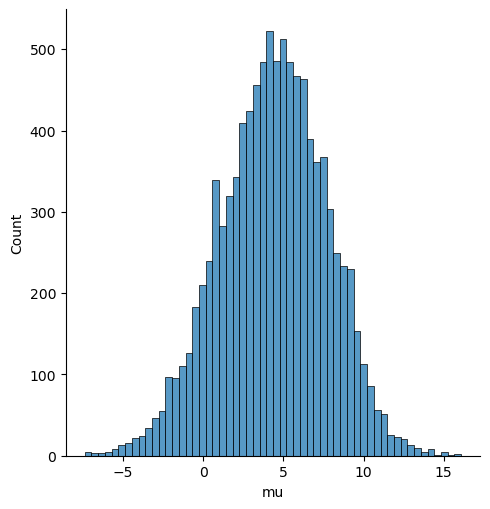

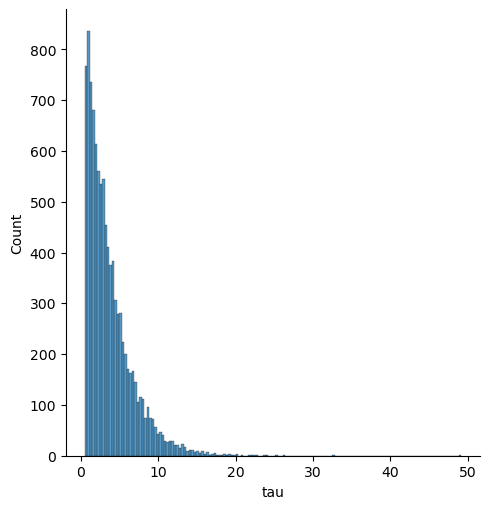

In [19]:
sns.displot(posterior_samples['mu'])
plt.xlabel('mu')
sns.displot(posterior_samples['tau'])
plt.xlabel('tau')
plt.show()

# 3. Evaluation

In [27]:
from scipy.stats import wasserstein_distance
from sklearn.metrics.pairwise import rbf_kernel

def compute_mmd(samples_approx, samples_true, kernel='rbf', bandwidth=1.0):
    """Compute Maximum Mean Discrepancy (MMD) between two sets of samples."""
    if kernel == 'rbf':
        K = rbf_kernel(samples_approx, samples_approx, gamma=1/(2*bandwidth**2))
        L = rbf_kernel(samples_true, samples_true, gamma=1/(2*bandwidth**2))
        KL = rbf_kernel(samples_approx, samples_true, gamma=1/(2*bandwidth**2))
    else:
        raise ValueError("Unsupported kernel type.")
    mmd = np.mean(K) + np.mean(L) - 2 * np.mean(KL)
    return mmd


In [21]:
np.abs(np.mean(reference_draws_df['mu']) - np.mean(posterior_samples['mu'])).item()

0.04504585266113281

In [22]:
np.abs(np.mean(reference_draws_df['mu']**2) - np.mean(posterior_samples['mu']**2)).item()

0.37284088134765625

In [23]:
wasserstein_distance(reference_draws_df['mu'], posterior_samples['mu']).item()

0.11565049130333642

In [24]:
wasserstein_distance(reference_draws_df['tau'], posterior_samples['tau']).item()

0.18227924106303303

In [37]:
compute_mmd(reference_draws_df['mu'].array.reshape(-1, 1), posterior_samples['mu'].reshape(-1, 1)).item()

0.0006493350727490577

In [36]:
compute_mmd(reference_draws_df['tau'].array.reshape(-1, 1), posterior_samples['tau'].reshape(-1, 1)).item()

0.005894386383954786